# Analysis of Text Matching Data Generated from JSTOR Dataset
## Generic version

In [16]:
import pandas as pd
import numpy as np
#import spacy
import re
import json
# import altair as alt
#new viz library for single-column heatmap
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
#from nltk.corpus import names
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 6]
plt.style.use('ggplot')

In [17]:
# ACTION: copy path to results JSONL file here (filename should end "_results_[hyperparameters].jsonl")

startData = "C:\\Users\\bdt\\Documents\\Joyce_1922_Ulysses_results_t2-c3-n2-m3-nostops.jsonl"

In [18]:
# Infer naming variables from path

textTitle = startData.rsplit("_", 4)[-3]
publicationYear = startData.rsplit("_", 4)[-4]
authorSurname = startData.rsplit("_", 4)[-5]
authorSurname = authorSurname.rsplit("/", 1)[-1]
hyperparSuffix = startData.rsplit("_", 4)[-1]
hyperparSuffix = f"_{hyperparSuffix[:-6]}"
dataDir = startData.rsplit("/", 4)[0]

print(f"Author surname: {authorSurname}\nPublication year: {publicationYear}\nText title: {textTitle}\nHyperparameters suffix: {hyperparSuffix}\nData directory:{dataDir}")

projectName = f"{authorSurname}_{publicationYear}_{textTitle}"
sourceDir = f"{dataDir}/{authorSurname}/{publicationYear}_{textTitle}/Source"
corpusDir = f"{dataDir}/{authorSurname}/{publicationYear}_{textTitle}/Corpus"
resultsDir = f"{dataDir}/{authorSurname}/{publicationYear}_{textTitle}/Results"

Author surname: C:\Users\bdt\Documents\Joyce
Publication year: 1922
Text title: Ulysses
Hyperparameters suffix: _t2-c3-n2-m3-nostops
Data directory:C:\Users\bdt\Documents\Joyce_1922_Ulysses_results_t2-c3-n2-m3-nostops.jsonl


In [47]:
# Load results as pandas dataframe

df = pd.read_json(startData, lines=True)
#df
#df.dtypes# print(df.loc[1:20])
#df2=df.sort_values('numMatches')

#selection = (df2['Year'] > 1950) & (df2['numMatches'] >= 1)
#df3=df2.loc[selection,['Year' ,'numMatches']]
#print(df3 )

#plt.b

#print(f"Items with matches: {len(df2[df2['numMatches']>=1])}\nItems without matches: {len(df2[df2['numMatches']==0])}")
#print(df.shape)  # Outputs: (3, 2)
#print(df.columns)  # Outputs: Index(['Name', 'Age'], dtype='object')
#print(df.index)  # Outputs: RangeIndex(start=0, stop=3, step=1)
#print(df.dtypes) 

#plt.bar(df3['numMatches'], df3['Year'])

       Year  numMatches
16193  1994           1
6      2012           1
254    2003           1
19484  1972           1
16066  2004           1
...     ...         ...
19498  2011          71
8487   1997          74
15271  1979          77
11016  1977          82
9651   2009          99

[4798 rows x 2 columns]
Items with matches: 4851
Items without matches: 14861


In [56]:
from collections import Counter
import matplotlib.pyplot as plt

# Count number of items with/without matches
#counter = Counter({"Items with matches": len(df[df['numMatches']>=1]), "Items without matches": len(df[df['numMatches']==0])})

decade_Values=df[['Decade','numMatches']]

#print(decade_Values.dtypes)
#print(df.dtypes)
#print(decade_Values.head())

# make selected_Values with filter on nummatches
selected_Values= decade_Values.loc[decade_Values['numMatches'] > 0, 'Decade']

selected_values = decade_Values.loc[decade_Values['numMatches'] > 0, 'Decade']
#selected_values2 = selected_values.sort_values('Value')

print(selected_values)

counter_selected_Values = Counter(selected_values['Decade'])
#counter_selected_values2 = selected_values.sort_values('Decade')

df5 = pd.DataFrame.from_dict(counter_selected_Values, orient='index').reset_index()

# Rename the columns
df5.columns = ['Value', 'Count']
#df5 = df5.sort_values(['Value', 'Count'])

3        1980
6        2010
9        1980
12       2000
13       1950
         ... 
19685    1960
19692    1990
19693    1980
19705    1980
19706    1980
Name: Decade, Length: 4851, dtype: int64


KeyError: 'Decade'

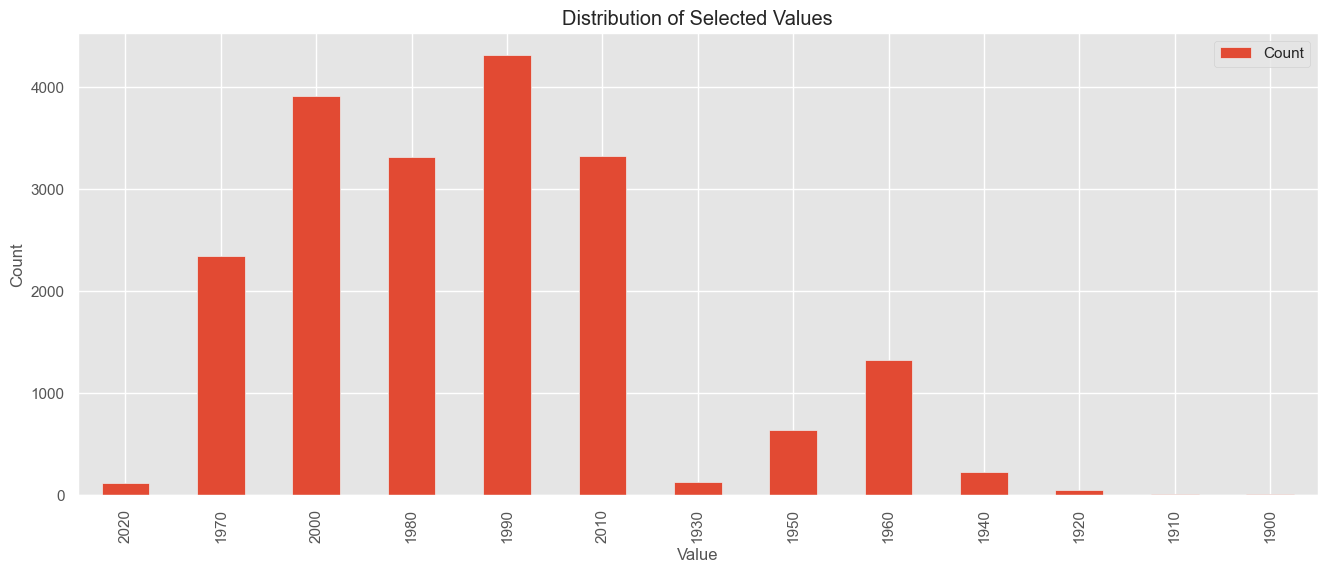

In [55]:

# Create a bar plot of the counts
df5.plot(kind='bar', x='Value', y='Count')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of Selected Values')

# Show the plot
plt.show()


In [43]:

filtered_Values_02=decade_Values.loc['numMatches'>=1]

#filtered_values = df.loc[df['column2'] == 'condition', 'column1']
#df['numMatches'] = pd.to_numeric(df['numMatches'], errors='coerce')
#decade_filtered_Values = df.loc(df[ 'Decade'])


print(counter_Decade_Values.head())

plt.bar(counter_Decade_Values.keys(), counter_Decade_Values.values())


TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:

# Add labels and title
plt.xlabel('Decade')
plt.ylabel('Citations')
plt.title('Number of citations in a decade')

# Show the plot
plt.show()

# Convert the Counter object to a DataFrame
df4 = pd.DataFrame.from_dict(filtered_Values_02, orient='index').reset_index()

# Rename the columns
df4.columns = ['Value', 'Count']

# Create a bar plot of the counts
df.plot(kind='bar', x='Value', y='Count')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of Filtered Values')

# Show the plot
plt.show()



In [33]:

# make quartiles  of decade_Values

# order  decade_Values  ascending

#lowest value, O1 meaian,  Q3  , highest falue  of dataframe decade_Values 



# Create a bar diagram
#plt.bar(counter.keys(), counter.values())

# Add labels and title
#plt.xlabel('Match Status')
#plt.ylabel('Count')
#plt.title('Number of Items With/Without Matches')

# Show the plot
#plt.show()



# test

In [ ]:
# Count number of items with/without matches

print(f"Items with matches: {len(df[df['numMatches']>=1])}\nItems without matches: {len(df[df['numMatches']==0])}")

In [ ]:
# Drop items with no matches from dataframe

df = df[df['numMatches']>=1]
df

,datePublished,docSubType,Year,Decade,docType,doi,id,identifier,isPartOf,issueNumber,...,url,wordCount,numMatches,Locations in A,Locations in B,creator,volumeNumber,abstract,placeOfPublication,subTitle
3,1985-04-01,None,1985,1980,document,10.2307/25477575,http://www.jstor.org/stable/25477575,"[{'name': 'doi', 'value': '10.2307/25477575'},...",None,1,...,http://www.jstor.org/stable/25477575,7507,10,"[[168085, 168181], [168210, 168247], [621989, ...","[[16324, 16420], [16427, 16463], [26079, 26110...",[Corinna del Greco Lobner],15,None,None,None
6,2012-04-01,None,2012,2010,document,10.2307/26636063,http://www.jstor.org/stable/26636063,"[{'name': 'doi', 'value': '10.2307/26636063'},...",James Joyce Literary Supplement,1,...,http://www.jstor.org/stable/26636063,1722,1,"[[285867, 285909]]","[[5289, 5331]]",[Mina Djuric],26,None,None,None
9,1982-12-01,book-review,1982,1980,article,10.2307/23040416,http://www.jstor.org/stable/23040416,"[{'name': 'doi', 'value': '10.2307/23040416'},...",Hermathena,133,...,http://www.jstor.org/stable/23040416,1193,1,"[[152807, 152837]]","[[7169, 7199]]","[DECLAN KIBERD, W. J. MCCORMACK, ALISTAIR STEAD]",None,None,None,None
12,2007-01-01,None,2007,2000,document,10.2307/25571032,http://www.jstor.org/stable/25571032,"[{'name': 'doi', 'value': '10.2307/25571032'},...",None,2,...,http://www.jstor.org/stable/25571032,2707,1,"[[228448, 228489]]","[[6999, 7040]]","[David Spurr, Robert Alter, Desmond Harding]",44,None,None,None
13,1959-01-01,None,1959,1950,document,10.2307/440607,http://www.jstor.org/stable/440607,"[{'name': 'doi', 'value': '10.2307/440607'}, {...",Twentieth Century Literature,4,...,http://www.jstor.org/stable/440607,9699,1,"[[1395983, 1396033]]","[[33997, 34047]]",None,4,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19685,1968-04-01,book-review,1968,1960,article,None,http://www.jstor.org/stable/25486704,"[{'name': 'issn', 'value': '00214183'}, {'name...",James Joyce Quarterly,3,...,http://www.jstor.org/stable/25486704,1558,1,"[[74179, 74268]]","[[9050, 9139]]","[Robert M. Adams, Robert Scholes]",5,None,None,None
19692,1993-07-01,research-article,1993,1990,article,10.2307/25515782,http://www.jstor.org/stable/25515782,"[{'name': 'doi', 'value': '10.2307/25515782'},...",None,None,...,http://www.jstor.org/stable/25515782,4099,1,"[[122279, 122309]]","[[268, 312]]","[George A. Thompson, <suffix>Jr.</suffix>, Ala...",30/31,None,None,None
19693,1987-10-01,None,1987,1980,document,10.2307/25484849,http://www.jstor.org/stable/25484849,"[{'name': 'doi', 'value': '10.2307/25484849'},...",None,1,...,http://www.jstor.org/stable/25484849,745,1,"[[1495141, 1495246]]","[[2640, 2745]]",[Ruth Bauerle],25,None,None,None
19705,1985-12-01,None,1985,1980,document,10.2307/26282265,http://www.jstor.org/stable/26282265,"[{'name': 'doi', 'value': '10.2307/26282265'},...",Modern Fiction Studies,4,...,http://www.jstor.org/stable/26282265,1231,3,"[[77499, 77571], [380646, 380711], [660785, 66...","[[4442, 4513], [5744, 5809], [6151, 6349]]","[MARVIN MAGALANER, James Joyce, Hans Walter Ga...",31,None,None,None


In [ ]:
# Display table with top n journal counts

# ACTION: specify number of journals to display

numJournals = 10

# Generate table of top n journal counts
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df["isPartOf"].value_counts()[0:numJournals])


isPartOf
James Joyce Quarterly              435
James Joyce Literary Supplement    300
European Joyce Studies             210
Joyce Studies Annual               208
James Joyce Broadsheet             165
Journal of Modern Literature       119
Modern Fiction Studies             101
Twentieth Century Literature        71
ELH                                 57
Studies in the Novel                46
Name: count, dtype: int64


In [ ]:
inputText = f"{sourceDir}/{projectName}_plaintext.txt"
with open(inputText) as f: 
    txt = f.read()

OSError: [Errno 22] Invalid argument: 'C:\\Users\\bdt\\Documents\\Joyce_1922_Ulysses_results_t2-c3-n2-m3-nostops.jsonl/C:\\Users\\bdt\\Documents\\Joyce/1922_Ulysses/Source/C:\\Users\\bdt\\Documents\\Joyce_1922_Ulysses_plaintext.txt'

In [ ]:
textALength = len(txt)
print(textALength)

NameError: name 'txt' is not defined

In [ ]:
# Make an empty array the size of the text

tally = np.zeros(textALength)
#tally = [0] * textALength

# Read the matched locations from the results dataset, and literally evaluate them into lists. 

locationsInA = df['Locations in A']

# Tally up every time a letter in the text is quoted. 
for article in locationsInA: 
    for locRange in article: 
         for i in range(locRange[0], min(locRange[1]+1, len(tally))):
                tally[i] += 1

NameError: name 'textALength' is not defined

In [ ]:
# Identify top 10 highest frequencies in descending order
topFreqs = list(set(tally))[:-21:-1]

print(topFreqs)

[94.0, 93.0, 92.0, 77.0, 37.0, 35.0, 33.0, 157.0, 28.0, 25.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19.0, 17.0, 16.0, 15.0, 14.0]


In [ ]:
quotedRange = np.where(tally == 412)[0].tolist()
print(quotedRange)

[54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


In [ ]:
print(txt[105054:105973])

 their prison. Then
they start and tremble, they call us by our name, and as soon as we have
recognised their voice the spell is broken. We have delivered them: they
have overcome death and return to share our life.

And so it is with our own past. It is a labour in vain to attempt to
recapture it: all the efforts of our intellect must prove futile. The past
is hidden somewhere outside the realm, beyond the reach of intellect, in
some material object (in the sensation which that material object will
give us) which we do not suspect. And as for that object, it depends on
chance whether we come upon it or not before we ourselves must die.

Many years had elapsed during which nothing of Combray, save what was
comprised in the theatre and the drama of my going to bed there, had any
existence for me, when one day in winter, as I came home, my mother,
seeing that I was cold, offered me some tea, a thing I did no


In [ ]:
if quotedRange[-1] - quotedRange[0] +1 == len(quotedRange):
    print("Continuous range")
else:
    print("Multiple ranges detected")

Multiple ranges detected


In [ ]:
for i in range(2, len(quotedRange)):
    if quotedRange[i] - quotedRange[i-1] != 1:
        print("Multiple ranges detected:")
        splitPoint = i
        firstQuot = quotedRange[:splitPoint]
        secondQuot = quotedRange[splitPoint:]
        print(txt[firstQuot[0]:firstQuot[-1]])
        print(txt[secondQuot[0]:secondQuot[-1]])
        break
else:
    print("Continuous range")

TypeError: 'numpy.float64' object is not callable

In [ ]:
for range in topFreqs:
    npRange = np.where(tally == range)[0]
    quotedRange = npRange.tolist()
    quotedExcerpt = txt[quotedRange[0]:quotedRange[-1]]
    print(f"Quoted {range} times: {quotedExcerpt}\n")

Quoted 114.0 times: there are many

Quoted 110.0 times: others

Quoted 85.0 times: du
Bois-de

Quoted 52.0 times: Boulogne

Quoted 45.0 times: Place de la Concorde

Quoted 43.0 times: years have passed

Quoted 42.0 times: Avenue

Quoted 38.0 times: since that night. The wall of the staircase,
up which I had watched the light of his candle gradually climb, was long
ago demolished. And in myself, too, many things have perished which, I
imagined, would last for ever, and new structures have arisen, giving
birth to new sorrows and new joys which in those days I could not have
foreseen, just as now the old are difficult of comprehension. It is a long
time, too, since my father has been able to tell Mamma to "Go with the
child." Never again will such hours be possible for me. But of late I have
been increasingly able to catch, if I listen attentively, the sound of the
sobs which I had the strength to control in my father's presence, and
which broke out only when I found myself alone with Mam

In [ ]:
# Identify selected frequencies in descending order
selectedFreqs = list(set(tally))[-22:-9]

print(selectedFreqs)

In [ ]:
for range in selectedFreqs:
    npRange = np.where(tally == range)[0]
    quotedRange = npRange.tolist()
    quotedExcerpt = txt[quotedRange[0]:quotedRange[-1]]
    print(f"Quoted {range} times: indices  
          {quotedExcerpt}\n")

In [ ]:
# Get page locations
pageMatches = txt.split('~')
pageMatches = [match.strip() for match in pageMatches]
len(pageMatches)

## How many articles do we have published in each year? 

In [ ]:
alt.Chart(df).mark_bar().encode(x='Year', y='count()').properties(width=1000)

alt.Chart(...)

# Find all articles quoting a given range

In [ ]:
df[df["Locations in A"].astype(str).str.contains("157027") == True]

,creator,datePublished,Year,Decade,docSubType,docType,id,identifier,isPartOf,issueNumber,...,volumeNumber,wordCount,numMatches,Locations in A,Locations in B,doi,keyphrase,abstract,placeOfPublication,subTitle
34,[Susan L. Martin-Márquez],1995-01-01,1995,1990,research-article,article,http://www.jstor.org/stable/27741246,"[{'name': 'doi', 'value': '10.2307/27741246'},...",None,1/2,...,20,7710,1,"[[157027, 157048]]","[[35828, 35848]]",10.2307/27741246,"[beverly hills, gimferrers, cinema, muerte, on...","In Pere Gimferrer's book of poetry, ""La muerte...",None,None
50,[NICHOLAS BIRNS],2016-01-01,2016,2010,None,document,http://www.jstor.org/stable/26106636,"[{'name': 'doi', 'value': '10.2307/26106636'},...",The Powys Journal,None,...,26,7995,1,"[[157027, 157048]]","[[41182, 41206]]",10.2307/26106636,"[owen glendower, nicholas birns, cowper powys,...",None,None,None
101,[David R. Buchanan],2006-06-01,2006,2000,None,document,http://www.jstor.org/stable/45056340,"[{'name': 'doi', 'value': '10.2307/45056340'},...",Health Education & Behavior,3,...,33,8948,1,"[[157027, 157048]]","[[19012, 19032]]",10.2307/45056340,"[health education, medical model, habermas, re...",This article describes two models for thinking...,None,None
267,[Robert Greer Cohn],1995-10-01,1995,1990,None,document,http://www.jstor.org/stable/20057323,"[{'name': 'doi', 'value': '10.2307/20057323'},...",New Literary History,4,...,26,7314,1,"[[157027, 157048]]","[[30189, 30209]]",10.2307/20057323,"[mallarme, mallarmes wake, literary history, t...",None,None,None
770,"[Pedro Sena Nunes, RACHEL MORGENSTERN-CLARREN]",2013-10-01,2013,2010,None,document,http://www.jstor.org/stable/24365592,"[{'name': 'doi', 'value': '10.2307/24365592'},...",BOMB,125,...,None,4618,1,"[[157027, 157048]]","[[24003, 24023]]",10.2307/24365592,"[tavares, sena nunes, pedro sena, writing, nei...",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20882,[NICHOLAS SHEA],2012-03-01,2012,2010,None,document,http://www.jstor.org/stable/23210080,"[{'name': 'doi', 'value': '10.2307/23210080'},...",None,2,...,84,15808,1,"[[157027, 157048]]","[[59047, 59067]]",10.2307/23210080,"[phenomenal, property, phenomenal consciousnes...",Block's well-known distinction between phenome...,None,None
21477,"[Lisa Block de Behar, Virginia Gutiérrez Berner]",2009-12-01,2009,2000,None,document,http://www.jstor.org/stable/41949656,"[{'name': 'doi', 'value': '10.2307/41949656'},...",CR: The New Centennial Review,3,...,9,12190,1,"[[157027, 157048]]","[[39117, 39137]]",10.2307/41949656,None,None,None,None
21564,"[Tom Simone, James Robinson]",2018-10-01,2018,2010,None,document,http://www.jstor.org/stable/26635956,"[{'name': 'doi', 'value': '10.2307/26635956'},...",James Joyce Literary Supplement,2,...,32,4518,1,"[[157027, 157048]]","[[11440, 11460]]",10.2307/26635956,None,None,None,None
21711,[Anthony Vidler],1989-06-01,1989,1980,None,document,http://www.jstor.org/stable/3171151,"[{'name': 'doi', 'value': '10.2307/3171151'}, ...",None,9,...,None,7162,1,"[[157027, 157048]]","[[16186, 16207]]",10.2307/3171151,"[architecture, stirlings, corbusier, schinkel,...",None,None,None


In [ ]:
df2["Locations in A"].iloc[1]

# Divide text into chunks

In [ ]:
def divideBySections(amount):
    text_occurrence, rangeBreakdown, xLabels = {}, [], []

    for i in range(0, amount):
        text_occurrence[str(i)] = 0
        rangeBreakdown.append(((textALength/amount)*(i), (textALength/amount)*(i+1)))
        xLabels.append(f"{i+1}")

    return text_occurrence, rangeBreakdown, xLabels

def plotPortionsOfQuotes(amount):

    text_occurrence, rangeBreakdown, xLabels = divideBySections(amount)

    for index, row in df.iterrows():
        for (quot_start,quot_end) in row['Locations in A']:
            for index,values in enumerate(rangeBreakdown):
                if (values[0]<=quot_start<=values[1]):
                    text_occurrence[str(index)] += 1

    total_occ = sum(text_occurrence.values())
    print(total_occ)
    for (key, val) in text_occurrence.items():
        print(key,val)


    plt.figure(facecolor='white')
    plt.bar(range(len(text_occurrence)), list(text_occurrence.values()),tick_label=xLabels)

    plt.xlabel("Segment of text")
    plt.ylabel("Number of quotations")
    plt.rcParams["figure.figsize"] = (30,10)
    plt.rcParams.update({'font.size': 18})
    plt.title("Number of quotations per segment of text")

    plt.show()


distributionCount = 10
plotPortionsOfQuotes(distributionCount)

# Average Numbers of Quoted Words Per Item

In [ ]:
df['Quoted Words'].describe()

In [ ]:
articlesWithMatches['Quoted Words'].describe()

In [ ]:
len(df[df['Quoted Words'] > 0])

In [ ]:
articlesWithMatches['Quoted Words'].hist()

## Stats about Wordcounts

Average number of words per match, per item: 

In [ ]:
articlesWithMatches['Wordcounts'].apply(np.mean).head()

In [ ]:
articlesWithMatches['Wordcounts'].apply(np.mean).describe()

#### Functions for extracting wordcounts, numbers of quotations for diachronic and synchronic analysis

In [ ]:
def diachronicAnalysis(df, decades=(1950, 2020), bins=chapterLocations, useWordcounts=True, normalize=True):
    """ Turning on useWordcounts makes it so that it's weighted by wordcount. 
    Turning it off uses raw numbers of quotations. """
    decades = np.arange(decades[0], decades[1], 10)
    # Make a dictionary of decades. 
    # Values are a list of locations.  
    decadeDict = {}
    for i, row in df.iterrows():
        decade = row['Decade']
        locationsAndWordcounts = row['Locations in A with Wordcounts']
        if decade not in decadeDict: 
            decadeDict[decade] = locationsAndWordcounts.copy()
        else: 
            decadeDict[decade] += locationsAndWordcounts.copy()
    # Grab the beginnings of quotes. 
    decadeStartsWeights = {decade: [(item[0][0], item[1]) 
                                    for item in loc] 
                    for decade, loc in decadeDict.items()}
    if useWordcounts: 
        decadesBinned = {decade: 
                     np.histogram([loc[0] for loc in locations], 
                                  bins=bins,
                                  weights=[loc[1] for loc in locations],
                                  range=(0, textALength))[0]
                     for decade, locations in decadeStartsWeights.items() 
                         if decade in decades}
    else: 
        decadesBinned = {decade: 
                     np.histogram([loc[0] for loc in locations], 
                                  bins=bins,
                                  range=(0, textALength))[0]
                     for decade, locations in decadeStartsWeights.items() 
                         if decade in decades}
    decadesDF = pd.DataFrame(decadesBinned).T
    #Normalize
    if normalize: 
        decadesDF = decadesDF.div(decadesDF.max(axis=1), axis=0)
    return decadesDF

def countWords(locRange): 
    """ Counts words in middlemarch, given character ranges. """
    chunk = mm[locRange[0]:locRange[1]]
    return len(chunk.split())

def totalWords(locRangeSet): 
    """ Counts total words in a list of location ranges. """
    return sum([countWords(locRange) for locRange in locRangeSet])    
    
def countsPerSet(locRangeSet): 
    """ Returns an augmented location range set that includes word counts. """
    return [(locRange, countWords(locRange))
             for locRange in locRangeSet]
    
def extractWordcounts(locsAndWordcounts): 
    """ 
    Takes pairs of location ranges and wordcounts, 
    and returns just the wordcounts. 
    """
    return [item[1] for item in locsAndWordcounts 
            if len(locsAndWordcounts) > 0]

def synchronicAnalysis(df, bins=chapterLocations, useWordcounts=True): 
    locs = df['Locations in A'].values
    locCounts = [(loc, countWords(loc)) for locSet in locs
              for loc in locSet]
    starts = [loc[0][0] for loc in locCounts]
    counts = [loc[1] for loc in locCounts]
    if useWordcounts: 
        binned = np.histogram(starts, bins=bins, 
                              weights=counts, range=(0, textALength))
    else: 
        binned = np.histogram(starts, bins=bins, 
                              range=(0, textALength))
    binnedDF = pd.Series(binned[0])
    return binnedDF

def plotDiachronicAnalysis(df, save=False, reverse=False): 
    ylabels = [str(int(decade)) for decade in df.index] + ['2020']
    plt.pcolor(df, cmap='gnuplot')
    plt.yticks(np.arange(len(df.index)+1), ylabels)
    plt.gca().invert_yaxis()
    plt.ylabel('Decade')
    plt.xlabel('Chapter')
    plt.gca().set_xlim((0, len(df.T)))
    plt.colorbar(ticks=[])
    if save: 
        plt.savefig('diachronic.png', bboxinches='tight', dpi=300, transparent=True)
    plt.show()
    
def plotSynchronicAnalysis(s, useWordcounts=True): 
    ax = s.plot(kind='bar')
    ax.set_xlabel('Chapter')
    if useWordcounts: 
        ax.set_ylabel('Number of Words Quoted')
    else: 
        ax.set_ylabel('Number of Quotations')
        
def plotSynchronicAnalysisHeatmap(s, useWordcounts=True): 
    vec1=synchronicAnalysis(df, useWordcounts=False)
    fig, ax = plt.subplots()
    sns.color_palette("magma")
    sns.heatmap([vec1])
    ax.set_xlabel('Chapter')
    ax.set_ylabel('Number of Quotations')
    
def plotDiachronicAnalysisBubble(df, save=False, reverse=False):
    ylabels = [str(int(decade)) for decade in df.index] + ['2020'] 
    alt.Chart(df).mark_circle().encode(
    x='Chapter',
    y='Decade',
    size='sum(count):Q'
)

In [ ]:
df['Quoted Words'] = df['Locations in A'].apply(totalWords)

In [ ]:
df['Locations in A with Wordcounts'] = df['Locations in A'].apply(countsPerSet)

In [ ]:
# Verify that the diachronic wordcounts are the same as the synchronic wordcounts
decadeSums = diachronicAnalysis(df, decades=(1700, 2020), useWordcounts=True, normalize=False).sum(axis=1)
decadeSums.sum()

In [ ]:
chapterSums = synchronicAnalysis(df)
chapterSums.sum()

# Quotation Length Statistics

In [ ]:
df['Wordcounts'] = df['Locations in A with Wordcounts'].apply(extractWordcounts)

In [ ]:
wordcounts = []
for countSet in df['Wordcounts'].values: 
    for count in countSet: 
        wordcounts.append(count)

In [ ]:
pd.Series(wordcounts).hist()

# Number of Quotes (and words Quoted) by Chapter

In [ ]:
plotSynchronicAnalysis(synchronicAnalysis(df))

In [ ]:
synchronicAnalysis(df, useWordcounts=True).to_csv('../papers/spring2017-middlemarch-paper/data/num-words-quoted-per-chapter.csv')

### Total number of matches

In [ ]:
allMatches = []
for group in df['Locations in A'].values: 
    for pair in group: 
        allMatches.append(pair)

In [ ]:
len(allMatches)

In [ ]:
plotSynchronicAnalysis(synchronicAnalysis(df, useWordcounts=False), useWordcounts=False)

In [ ]:
quotationsPerChapter = synchronicAnalysis(df, bins=chapterLocations, useWordcounts=False)
quotationsPerChapter

In [ ]:
quotationsPerChapter = pd.DataFrame(quotationsPerChapter, index=range(0,88), columns=['Number of Quotations'])
quotationsPerChapter['Chapter'] = range(0, 88)
quotationsPerChapter

In [ ]:
alt.Chart(quotationsPerChapter).mark_circle().encode(x='Chapter:O', size='Number of Quotations:Q').properties(width=1000, height=150)

In [ ]:
alt.Chart(quotationsPerChapter).mark_circle().encode(x='Chapter:O', size=alt.Size('Number of Quotations:Q', scale=alt.Scale(range=[1, 1000]))).properties(width=1000, height=150)

In [ ]:
# Redo chart with horizontal labels
alt.Chart(quotationsPerChapter).mark_circle().encode(x=alt.X('Chapter:Q', axis=alt.Axis(title="Chapter", tickMinStep=5,
                                       labelOverlap=False,labelAngle=0)), 
size=alt.Size('Number of Quotations:Q', scale=alt.Scale(range=[1, 1000]))).properties(width=1000,height=150).configure_legend(
    titleFontSize=9,
    labelFontSize=10
)

In [ ]:
alt.Chart(quotationsPerChapter).mark_circle().encode(y='Chapter:O', size=alt.Size('Number of Quotations:Q', scale=alt.Scale(range=[1, 1000]))).properties(width=150)

## Quotations Per Book

In [ ]:
quotationsPerBook = synchronicAnalysis(df, bins=bookLocations, useWordcounts=False)
quotationsPerBook

In [ ]:
quotationsPerBook = pd.DataFrame(quotationsPerBook, index=range(1,9), columns=['Number of Quotations'])
quotationsPerBook['Book'] = range(1, 9)
quotationsPerBook

In [ ]:
alt.Chart(quotationsPerBook).mark_bar().encode(x='Book:O', y='Number of Quotations:Q').properties(width=500)

In [ ]:
alt.Chart(quotationsPerBook).mark_circle().encode(x='Book:O', size=alt.Size('Number of Quotations:Q')).properties(height=150).configure_legend(
titleFontSize=9,
labelFontSize=10
) 

In [ ]:
# Redo chart with horizontal labels
alt.Chart(quotationsPerBook).mark_circle().encode(x=alt.X('Book:O', axis=alt.Axis(title="Book", labelAngle=0,)), 
size=alt.Size('Number of Quotations:Q')).properties(height=150).configure_legend(
    titleFontSize=9,
    labelFontSize=10
)

## Raw Number of Quotations Per Chapter

In [ ]:
# Get the raw number of quotations per chapter
# synchronicAnalysis(df, useWordcounts=False).to_csv('../papers/spring2017-middlemarch-paper/data/num-quotations-per-chapter.csv')

In [ ]:
# Adjusted for the number of words in each chapter
ax = (synchronicAnalysis(df) / chapterLengthsSeries).plot(kind='bar')
ax.set_xlabel('Chapter')
ax.set_ylabel('Words Quoted, Normalized')

In [ ]:
plotDiachronicAnalysis(diachronicAnalysis(df, decades=(1950, 2020), bins=chapterLocations).sort_index())

In [ ]:
plotDiachronicAnalysis(diachronicAnalysis(df, decades=(1960, 2020), bins=chapterLocations).sort_index())

In [ ]:
# Create a one-dimensional heatmap of the synchonic raw number of quotations per chapter, as heatmap
vec1=synchronicAnalysis(df, useWordcounts=False)
fig, ax = plt.subplots()
sns.color_palette("magma")
sns.heatmap([vec1])
ax.set_xlabel('Chapter')
ax.set_ylabel('Number of Quotations')

In [ ]:
# Create a one-dimensional heatmap of the synchonic raw number of quotations per chapter, as heatmap
# INVERTED COLOR SCHEMA
vec1=synchronicAnalysis(df, useWordcounts=False)
fig, ax = plt.subplots()
sns.heatmap([vec1], cmap = 'magma_r')
ax.set_xlabel('Chapter')
ax.set_ylabel('Number of Quotations')

In [ ]:
diaDF = diachronicAnalysis(df, decades=(1960, 2020), bins=chapterLocations).sort_index()

In [ ]:
diaDFquoteOnly = diachronicAnalysis(df, decades=(1960, 2020), bins=chapterLocations, useWordcounts=False, normalize=False).sort_index()

In [ ]:
plotDiachronicAnalysisBubble(diachronicAnalysis(df, decades=(1960, 2020), bins=chapterLocations).sort_index())

In [ ]:
synDF = synchronicAnalysis(df, useWordcounts=False)

In [ ]:
synDF.index.name = 'chapter'

In [ ]:
synDF

## Redo chart in Altair

In [ ]:
diaDF.columns.name = 'chapter'
diaDF.index.name = 'decade'

In [ ]:
diaDF

In [ ]:
# Redo with raw quotations, not normalized by decade
diaDFquoteOnly.columns.name ='chapter'
diaDFquoteOnly.index.name = 'decade'

In [ ]:
diaDFquoteOnly

In [ ]:
diaDF.columns

In [ ]:
diaDF['decade'] = diaDF.index

In [ ]:
diaMelted = diaDF.melt(id_vars='decade')

In [ ]:
diaDFquoteOnly['decade'] = diaDFquoteOnly.index

In [ ]:
diaDFquoteOnlyMelted = diaDFquoteOnly.melt(id_vars='decade')

In [ ]:
alt.Chart(diaMelted).mark_rect().encode(x='chapter:O', y='decade:O', color=alt.Color('value', legend=alt.Legend(title="# of Quotations (normalized)"))).properties(width=1000, height=300).configure(background='#eeeeeeff')

In [ ]:
alt.Chart(diaMelted).mark_circle().encode(x='chapter:O', y='decade:O', size=alt.Size('value',  legend=alt.Legend(title="Number of Quotations (normalized)"), scale=alt.Scale(type = 'threshold', domain = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], range =[0, 20, 60, 100, 150, 250, 350, 500, 750, 1000, 1500, 2000,]))).properties(width=1000, height=300).configure_legend(
titleFontSize=9,
labelFontSize=10
) 

In [ ]:
#Redo Chart to rotate tick marks
alt.Chart(diaMelted).mark_circle().encode(
    x=alt.X('chapter:Q', axis=alt.Axis(tickMinStep=5,
                                       labelOverlap=False,
                                   labelAngle=0)), 
    y=alt.Y('decade:O'), 
    size=alt.Size('value',  legend=alt.Legend(title="Number of Quotations (normalized)"), 
                  scale=alt.Scale(type = 'threshold', domain = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], range =[0, 20, 60, 100, 150, 250, 350, 500, 750, 1000, 1500, 2000,]))).properties(width=1000, height=300).configure_legend(
titleFontSize=9,
labelFontSize=10
) 

In [ ]:
#Chart with raw quotations
alt.Chart(diaDFquoteOnlyMelted).mark_rect().encode(x='chapter:O', y='decade:O', color='value').properties(width=1000, height=300)

In [ ]:
alt.Chart(diaDFquoteOnlyMelted).mark_circle().encode(x='chapter:O', y='decade:O', size='value').properties(width=1000, height=300)

In [ ]:
booksDiaDF = diachronicAnalysis(df, decades=(1960, 2020), bins=bookLocations).sort_index()
booksDiaDF

In [ ]:
booksDiaDF['decade'] = booksDiaDF.index

In [ ]:
booksMelted = booksDiaDF.melt(id_vars='decade', var_name='book')

In [ ]:
booksMelted.head()

In [ ]:
booksMelted = booksMelted[booksMelted.book != 0]
booksMelted

In [ ]:
alt.Chart(booksMelted).mark_rect().encode(x='book:O', y='decade:O', color=alt.Color('value', legend=alt.Legend(title="# of Quotations (normalized)"))).properties(width=500, height=300).configure(background='#eeeeeeff')

In [ ]:
alt.Chart(booksMelted).mark_circle().encode(x='book:O', y='decade:O', size='value').properties(width=500, height=300)

In [ ]:
alt.Chart(booksMelted).mark_circle().encode(x='book:O', y='decade:O', size=alt.Size('value', legend=alt.Legend(title="Number of Quotations (normalized)"), scale=alt.Scale(type = 'threshold', domain = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], range =[0, 20, 60, 100, 150, 250, 350, 500, 750, 1000, 1500, 2000,]))).properties(width=500, height=300).configure_legend(
titleFontSize=9,
labelFontSize=10
) 

In [ ]:
#Redo Chart to rotate tick marks
alt.Chart(booksMelted).mark_circle().encode(
    x=alt.X('book:O', axis=alt.Axis(labelOverlap=True,
                                   labelAngle=0)), 
    y=alt.Y('decade:O'), 
    size=alt.Size('value',  legend=alt.Legend(title="Number of Quotations (normalized)"), 
                  scale=alt.Scale(type = 'threshold', domain = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], range =[0, 20, 60, 100, 150, 250, 350, 500, 750, 1000, 1500, 2000,]))).properties(width=500, height=300).configure_legend(
titleFontSize=9,
labelFontSize=10
) 

In [ ]:
def plotDiachronicAnalysisBooks(df, save=False, reverse=False): 
    ylabels = [str(int(decade)) for decade in df.index] + ['2020']
    plt.pcolor(df, cmap='gnuplot')
    plt.yticks(np.arange(len(df.index)+1), ylabels)
    plt.gca().invert_yaxis()
    plt.ylabel('Decade')
    plt.xlabel('Book')
    plt.gca().set_xlim((1, len(df.T)))
    plt.colorbar(ticks=[])
    if save: 
        plt.savefig('diachronic.png', bboxinches='tight', dpi=300, transparent=True)
    plt.show()

plotDiachronicAnalysisBooks(diachronicAnalysis(df, decades=(1950, 2020), bins=bookLocations).sort_index())

In [ ]:
# Export image for publication
# plotDiachronicAnalysis(diachronicAnalysis(df, decades=(1950, 2020), bins=chapterLocations), save=True)

In [ ]:
# Get the normalized proportion of, say, Chapter 20 in 1950: 
diachronicAnalysis(df)[20][1950]

# By (Guessed) Gender of Author

In [ ]:
maleNames, femaleNames = names.words('male.txt'), names.words('female.txt')
maleNames = [name.lower() for name in maleNames]
femaleNames = [name.lower() for name in femaleNames]

In [ ]:
def guessGender(name): 
    name = name.split()[0].lower() # Grab the first name. 
    if name in maleNames and name in femaleNames: 
        return 'A' #Ambiguous
    elif name in maleNames: 
        return 'M'
    elif name in femaleNames: 
        return 'F'
    else: 
        return 'U'

def averageGender(names): 
    if type(names) != list: 
        return 'U'
    genderGuesses = [guessGender(name) for name in names]
    stats = Counter(genderGuesses).most_common()
    if len(stats) == 1: 
        # Only one author. We can just use that's author's gender guess. 
        return stats[0][0]
    elif stats[0][1] == stats[1][1]: # There's a tie. 
        return 'A' # Ambiguous. 
    else: 
        return stats[0][0] # Return the most common gender. 
        

In [ ]:
df['gender'] = df['author'].apply(averageGender)
dfF = df.loc[df['gender'] == 'F']
dfM = df.loc[df['gender'] == 'M']

In [ ]:
# Differences in citations between genders. 
plotSynchronicAnalysis(synchronicAnalysis(dfM) - synchronicAnalysis(dfF))

# By (Guessed) Country of Publication

In [ ]:
def getFirst(row): 
    if type(row) == list: 
        return row[0]
    else: 
        return row

topPublishers = df['publisher_name'].apply(getFirst).value_counts()

In [ ]:
publishers = topPublishers[:80].index

In [ ]:
publishers = publishers.tolist()

In [ ]:
def getCountry(publisher): 
    brits = ['Oxford University Press', 'Cambridge University Press', 'Modern Humanities Research Association', \
             'BMJ', 'Taylor & Francis, Ltd.', 'Edinburgh University Press', \
             'Royal Society for the Encouragement of Arts, Manufactures and Commerce']
    canadians = ['Victorian Studies Association of Western Canada'] 
    if type(publisher) != list: 
        return 'Unknown'
    publisher = publisher[0]
    if publisher in brits: 
        return 'Britain' 
    elif publisher in canadians or 'Canada' in publisher: 
        return 'Canada' 
    elif 'GmbH' in publisher: 
        return 'Germany'
    elif 'estudios' in publisher: 
        return 'Spain'
    elif 'France' in publisher: 
        return 'France' 
    elif 'Ireland' in publisher: 
        return 'Ireland'
    else: 
        return 'US'

In [ ]:
df['country'] = df['publisher_name'].apply(getCountry)

In [ ]:
df['country'].value_counts()

In [ ]:
dfBrits = df.loc[df['country'] == 'Britain']
dfYanks = df.loc[df['country'] == 'US']
dfCanadians = df.loc[df['country'] == 'Canada']

In [ ]:
# Since British authors are greatly outnumbered in this corpus, we should normalize the data. 
britsHist = synchronicAnalysis(dfBrits) 
normBrits = britsHist.div(britsHist.max())
yanksHist = synchronicAnalysis(dfYanks)
normYanks = yanksHist.div(yanksHist.max())

In [ ]:
plotSynchronicAnalysis(normYanks - normBrits)

# By Journal

In [ ]:
# Look at the top journals. 
journalStats = df['journal'].value_counts()
journalStats[:10]

In [ ]:
journalList = journalStats.index

Compare the specialist journal, "George Eliot - George Henry Lewes Studies," with all other journals. 

In [ ]:
geJournals = df.loc[df['journal'] == 'George Eliot - George Henry Lewes Studies']
otherJournals = df.loc[df['journal'] != 'George Eliot - George Henry Lewes Studies']

In [ ]:
# Normalize
geDF = synchronicAnalysis(geJournals)
otherDF = synchronicAnalysis(otherJournals)
normGE = geDF.div(geDF.max())
normOther = otherDF.div(otherDF.max())

In [ ]:
fig = plt.figure()
ax = (normGE - normOther).plot(kind='bar')
fig.add_subplot(ax)
ax.set_xlabel('Chapter')
ax.set_ylabel('Specialization Index')
# Save a big version for publication. 
fig.savefig('specialization.png', bboxinches='tight', dpi=300)

In [ ]:
journals = pd.DataFrame({title: synchronicAnalysis(df.loc[df['journal'] == title]) for title in journalList }).T

In [ ]:
cutoff = 1500
topJournals = journals.loc[journals.sum(axis=1) > cutoff]
otherJournals = journals.loc[journals.sum(axis=1) < cutoff]
topJournals.loc['Other'] = otherJournals.sum()

In [ ]:
topJournals.T.plot(kind='bar', stacked=True, colormap='nipy_spectral')

In [ ]:
ax = topJournals.T.plot(kind='bar', stacked=True, colormap='nipy_spectral')
fig = ax.get_figure()
fig.savefig('synchronic-journals.png', bboxinches='tight', dpi=300)

In [ ]:
# Print the total number of journals
len(journalStats)

# Detour: Ch. 15

In [ ]:
# Try to find out why Ch. 15 was so big in the 80s and 90s. 
chap15s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1980, 1990]: 
        for start in starts: 
            if start > 290371 and start < 322052: # Does it cite Chapter XV? 
                if row.id not in ids: 
                    chap15s.append(row)
                    ids.append(row.id)

In [ ]:
# Get the titles of those articles. 
[item.title for item in chap15s]

In [ ]:
ch15Topics =  [item.topics for item in chap15s]
chap15TopicsFlat = [item for sublist in ch15Topics for item in sublist]
Counter(chap15TopicsFlat).most_common(20)

In [ ]:
xvStart, xvEnd = chapterLocations[15:17]

In [ ]:
print(mm[xvStart:xvStart+1000]) 

In [ ]:
# Try to find out which articles cite the first 2/3 of Chapter XV (with Lydgate's scientific research) 
# vs the last 1/3 on the story of Laure
chap15p1s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1980, 1990]: 
        for start in starts: 
            if start > 290371 and start < 313892: # Does it cite the first 2/3 of Chapter XV? 
                if row.id not in ids: 
                    chap15p1s.append(row)
                    ids.append(row.id)
chap15p2s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1980, 1990]: 
        for start in starts: 
            if start > 313892 and start < 322052: # Does it cite the last 1/3 of Chapter XV? 
                if row.id not in ids: 
                    chap15p2s.append(row)
                    ids.append(row.id)                   
                    

In [ ]:
# Get the titles of articles citing the first 2/3 
[item.title for item in chap15p1s]

In [ ]:
# Get the titles of those articles. 
[item.title for item in chap15p2s]

In [ ]:
# Verify that we have the right location for the start of Laure's story in the last 1/3 of Chapter XV
print(mm[313892:313892+1500]) 

In [ ]:
# Verify the location of the eipgraph and first paragraph
print(mm[290371:290371+1571]) 

In [ ]:
chap15para1s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1980, 1990]: 
        for start in starts: 
            if start > 290371 and start < 291943: # Does it cite the last 1/3 of Chapter XV? 
                if row.id not in ids: 
                    chap15para1s.append(row)
                    ids.append(row.id)    

In [ ]:
# Get the titles of articles that cite paragraph 1 of Chapter 15
[item.title for item in chap15para1s]

In [ ]:
chap15Lydgates = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1980, 1990]: 
        for start in starts: 
            if start > 291942 and start < 313892: # Does it cite the first 2/3 of Chapter XV? 
                if row.id not in ids: 
                    chap15Lydgates.append(row)
                    ids.append(row.id)
                    
# Get the titles of articles that cite Lydgate section
[item.title for item in chap15Lydgates]

# Chapter 20

Chapter 20 Detour


In [ ]:
# Try to find out what articles cited chapter 20 
chap20s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1870, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]: 
        for start in starts: 
            if start > 406324 and start < 432778: # Does it cite Chapter XX? 
                if row.id not in ids: 
                    chap20s.append(row)
                    ids.append(row.id)


In [ ]:
# Get the titles of those articles. 
[item.title for item in chap20s]

In [ ]:
# articlesWithoutMatches.title #Print the titles of articles without matches


In [ ]:
len(chap20s)

In [ ]:
# Try to find out what articles cite paragraph 6 in Chapter 20
chap20par6s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1870, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]: 
        for start in starts: 
            if start > 411152 and start < 412177: # Does it cite Chapter XX? 
                if row.id not in ids: 
                    chap20par6s.append(row)
                    ids.append(row.id)


In [ ]:
# Get the titles of those articles.
[item.title for item in chap20par6s]

In [ ]:
len(chap20par6s) # The number of items citing paragraph 6 in chapter 20

In [ ]:
xxStart, xxEnd = chapterLocations[20:22] # Chapter 20 Boundaries

In [ ]:
print(mm[xxStart:xxStart+1000]) # Verify we have Ch. 20

In [ ]:
xx = mm[xxStart:xxEnd]

In [ ]:
xxParaLocations = [match.start() for match in re.finditer('\n\n+', mm)]
xxParaLocations = [x for x in xxParaLocations if (x > xxStart) and (x < xxEnd)] 

In [ ]:
mm[xxParaLocations[4]:xxParaLocations[5]]

In [ ]:
articlesWithMatches['Locations in A'].loc[0]

In [ ]:
def inXX(matches): 
    """ Determine if the article has a match in Ch. 20"""
    for match in matches: 
        if match[0] > xxStart and match[0] < xxEnd:
            return True
    return False

In [ ]:
articlesWithMatches['Locations in A'].apply(inXX).head()

In [ ]:
def paraIndicesIn20(matches, paraLocations=xxParaLocations): 
    """ Determine paragraph number (index) for match in Ch. 20. """
    paraIndices = []
    if inXX(matches): 
        paraBoundaries = list(zip(paraLocations, paraLocations[1:]))
        for match in matches: 
            for i, paraBoundary in enumerate(paraBoundaries): 
                if set(range(match[0], match[1])) & set(range(paraBoundary[0], paraBoundary[1])): # find the set intersection of the ranges of pairs
                    paraIndices.append(i)
                else: 
                    paraIndices.append(None)
    return paraIndices
                    
                

In [ ]:
len(set(range(8, 10)) & set(range(1, 9)))

In [ ]:
articlesWithMatches['paraIndicesIn20'] = articlesWithMatches['Locations in A'].apply(paraIndicesIn20)

In [ ]:
counters = list(articlesWithMatches['paraIndicesIn20'].apply(Counter))

In [ ]:
grandTally = Counter()

In [ ]:
for counter in counters: 
    grandTally += counter

In [ ]:
del grandTally[None]

In [ ]:
dict(grandTally)

In [ ]:
pd.Series(dict(grandTally)).sort_index().plot(kind='bar')

In [ ]:
print(mm[xxParaLocations[5]:xxParaLocations[7]]) # What are paragraphs #5 and #6? 

# NLH, ELH and GE-GHL

## George Eliot - George Henry Lewes Studies

### George Eliot - George Henry Lewes Studies articles where journal title is "George Eliot - George Henry Lewes Studies"

In [ ]:
geJournals = df.loc[df['journal'] == 'George Eliot - George Henry Lewes Studies']

In [ ]:
pd.set_option('display.max_columns', 207)

In [ ]:
geJournals 

In [ ]:
print(geJournals.title)

In [ ]:
print("Number of George ELiot - George Henry Lewes Studies articles where journal title is 'George ELiot - George Henry Lewes Studies':")
len(geJournals)

### George Eliot - George Henry Lewes Studies articles where journal code is "georelioghlstud"

In [ ]:
print("Number of George Eliot - George Henry Lewes Studies articles where journal code is 'georelioghlstud':")
geJournalCodes = df.loc[df['jcode'].str[0] == 'georelioghlstud']
len(geJournalCodes)

## NLH

### NLH articles where journal title is "New Literary History"

In [ ]:
nlhJournals = df.loc[df['journal'] == 'New Literary History']

In [ ]:
pd.set_option('display.max_rows', 300)

In [ ]:
nlhJournals 

In [ ]:
print("Number of NLH articles where journal title is 'New Literary History':")
len(nlhJournals)

### NLH articles where journal code is "newlitehist"

In [ ]:
print('NLH articles where journal code is "newlitehist":')
nlhJournalCodes = df.loc[df['jcode'].str[0] == 'newlitehist']
len(nlhJournalCodes)

## ELH

### ELH articles where journal title is "ELH"

In [ ]:
elhJournals = df.loc[df['journal'] == 'ELH']
elhJournals

In [ ]:
len(elhJournals)

### ELH articles where journal code is "elh"

In [ ]:
elhJournalCodes = df.loc[df['jcode'].str[0] == 'elh']
len(elhJournalCodes)